## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.columns
#study_results.columns
#print(1893/249)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on="Mouse ID",how='outer')
# Display the data table for preview
df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
df = df.dropna()
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
rows_count = len(df)
rows_count

1893

In [4]:
# Checking the number of mice.
mouse_count = len(df['Mouse ID'].value_counts())
mouse_count


249

In [5]:
df['Mouse ID'].nunique()


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
gr_df = df.groupby('Mouse ID')
gr_df['Timepoint'].value_counts(ascending=True)


Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Name: Timepoint, Length: 1888, dtype: int64

In [7]:
duplicates = df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)
duplicates.value_counts()

False    1883
True       10
dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

df['Duplicate'] = duplicates
df
duplicate_mice_df = df.loc[df['Duplicate']== True,:]
duplicate_mice_df['Mouse ID'].value_counts()
g989_df = df.loc[df['Mouse ID']=='g989',:]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID']!='g989',:]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df['Mouse ID'].nunique()
mouse_count


248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume 
# for each regimen. LECTURE 3.
stats_df = clean_df.groupby(['Drug Regimen','Timepoint'])
mean_se = stats_df['Tumour Volume (mm3)'].mean()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.



In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
median_se =stats_df['Tumour Volume (mm3)'].median()
stats = pd.merge(mean_se,median_se,on=['Drug Regimen','Timepoint'])
stats = stats.rename(columns={'Tumour Volume (mm3)_x':'Mean',
                              'Tumour Volume (mm3)_y':'Median'})

sdev = stats_df['Tumour Volume (mm3)'].std()

var = stats_df['Tumour Volume (mm3)'].var()
stats['Variance']=var
stats['St.Deviation']=sdev
sem = stats_df['Tumour Volume (mm3)'].sem()
stats['SEM']=sem
stats.head()

# Summary statistics = stats. Grouped by drug regimen & timepoint.

Mean     Median   Variance  St.Deviation  \
Drug Regimen Timepoint                                                  
Capomulin    0          45.000000  45.000000   0.000000      0.000000   
             5          44.266086  45.597064   5.030889      2.242964   
             10         43.084291  43.421014  12.344133      3.513422   
             15         42.064317  42.798160  16.878693      4.108369   
             20         40.716325  40.716428  19.035028      4.362915   

                             SEM  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731

In [43]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_list = clean_df['Drug Regimen'].unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Bar and Pie Charts

In [56]:

timepoints = clean_df['Drug Regimen'].value_counts()
timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

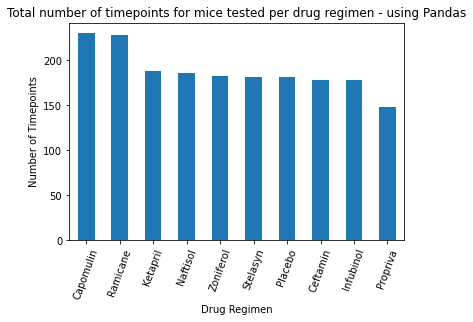

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig1 = timepoints.plot(kind='bar',title='Total number of timepoints for mice tested per drug regimen - using Pandas')
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Timepoints")
xtick=timepoints.index
fig1.set_xticklabels(xtick, rotation=70)
plt.show()


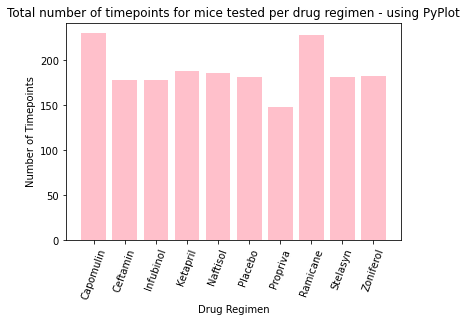

In [81]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = timepoints.sort_index()
timepoints

drug_list.sort()


plt.bar(drug_list,timepoints,color='pink',align='center')
plt.title('Total number of timepoints for mice tested per drug regimen - using PyPlot')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
new_list = [value for value in drug_list]
plt.xticks(new_list,rotation=70)
plt.show()

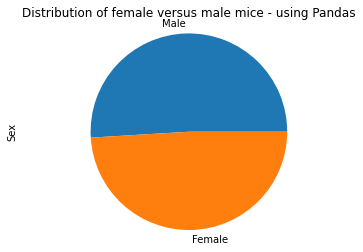

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distr = clean_df['Sex'].value_counts()
sex_distr
pd_pie = sex_distr.plot(kind='pie',y='Sex',title='Distribution of female versus male mice - using Pandas')
plt.axis('equal')
plt.show()

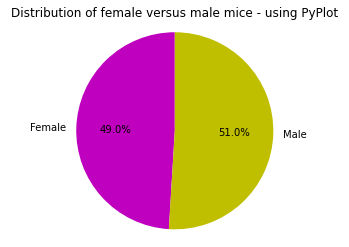

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

clean_df.head(5)
fem_df = clean_df.loc[clean_df['Sex']=='Female',:]
mle_df = clean_df.loc[clean_df['Sex']=='Male',:]
count = [len(fem_df),len(mle_df)]
labels = ['Female','Male']
colours = ['m','y']
plt.pie(count,labels=labels,colors=colours,autopct="%1.1f%%",startangle=90)
plt.axis('equal')
plt.title('Distribution of female versus male mice - using PyPlot')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
